<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Deep_Learning_Assignments/blob/main/Deep%20Learning%20Assignment%201/FastAI_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Statements

In [ ]:
#hide
#! [ -e /content ] && pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()

In [ ]:
#hide
#rom fastbook import *
from fastai.vision.all import *

Segmentation

Using the unet_learner model to perform segmentation

In segmentation, we create a model such that it can recognize every pixel of an image

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.777660,2.407406,00:10


epoch,train_loss,valid_loss,time
0,1.826785,1.605291,00:01
1,1.568261,1.597401,00:01
2,1.464866,1.290720,00:01
3,1.344410,1.080445,00:01
4,1.223940,0.895336,00:01
5,1.110180,0.803900,00:01
6,1.012078,0.756226,00:01
7,0.935262,0.745997,00:01


Prediction using the trained model. The images show the objects pixel by pixel and distict object

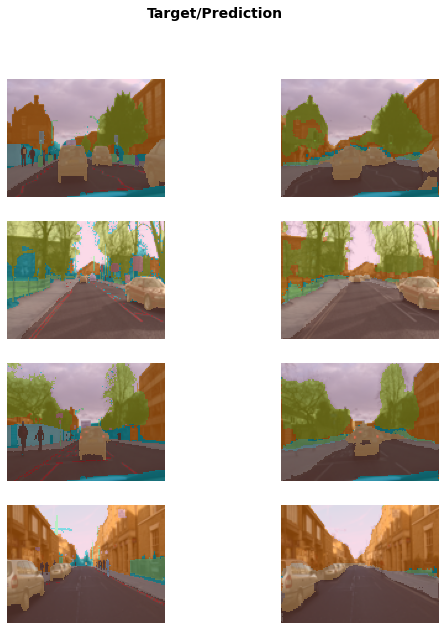

In [ ]:
learn.show_results(max_n=4, figsize=(9,10))